<a href="https://colab.research.google.com/github/PerawitDeawpanich/CN334-Template-Perawit/blob/master/SF251_In_Class_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Exercise 3

Once done, upload to MS Teams

## Pokemon Dataset Part 3

Data from https://www.kaggle.com/datasets/cristobalmitchell/pokedex

This time we will plot some comparison plots. (We will learn more plots for comparison next class.)

In [1]:
!wget https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv

--2026-01-30 07:45:45--  https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331632 (324K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>] 323.86K  --.-KB/s    in 0.03s   

2026-01-30 07:45:45 (9.65 MB/s) - ‘pokemon.csv’ saved [331632/331632]



In [2]:
import pandas as pd
from plotnine import *

In [3]:
#Load the data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,national_number,gen,english_name,japanese_name,primary_type,secondary_type,classification,percent_male,percent_female,height_m,...,evochain_1,evochain_2,evochain_3,evochain_4,evochain_5,evochain_6,gigantamax,mega_evolution,mega_evolution_alt,description
0,1,I,Bulbasaur,Fushigidane,grass,poison,Seed Pokémon,88.14,11.86,0.7,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,There is a plant seed on its back right from t...
1,2,I,Ivysaur,Fushigisou,grass,poison,Seed Pokémon,88.14,11.86,1.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,"When the bulb on its back grows large, it appe..."
2,3,I,Venusaur,Fushigibana,grass,poison,Seed Pokémon,88.14,11.86,2.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,Gigantamax Venusaur,Mega Venusaur,NaN,Its plant blooms when it is absorbing solar en...
3,4,I,Charmander,Hitokage,fire,NaN,Lizard Pokémon,88.14,11.86,0.6,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,It has a preference for hot things. When it ra...
4,5,I,Charmeleon,Lizardo,fire,NaN,Flame Pokémon,88.14,11.86,1.1,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,"It has a barbaric nature. In battle, it whips ..."


In [4]:
pokemon.columns

Index(['national_number', 'gen', 'english_name', 'japanese_name',
       'primary_type', 'secondary_type', 'classification', 'percent_male',
       'percent_female', 'height_m', 'weight_kg', 'capture_rate',
       'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'abilities_0', 'abilities_1', 'abilities_2',
       'abilities_hidden', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fighting',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy', 'is_sublegendary',
       'is_legendary', 'is_mythical', 'evochain_0', 'evochain_1', 'evochain_2',
       'evochain_3', 'evochain_4', 'evochain_5', 'evochain_6', 'gigantamax',
       'mega_evolution', 'mega_evolution_alt', 'description'],
      dtype='object')

**Q1**: Create a plot to compare the number of legendary pokemon (`is_legendary`) across all gen.

In [5]:
# Expected result

In [6]:
# Expected result

**Q2**: Create a new column `is_special` which is 1 when the pokemon is either legenday (`is_legendary`), sublegendary (`is_sublegendary`), or mythical (`is_mythical`) and 0 otherwise. Then create a plot to compare the number of special pokemon across all gen.

In [7]:
# Expected result

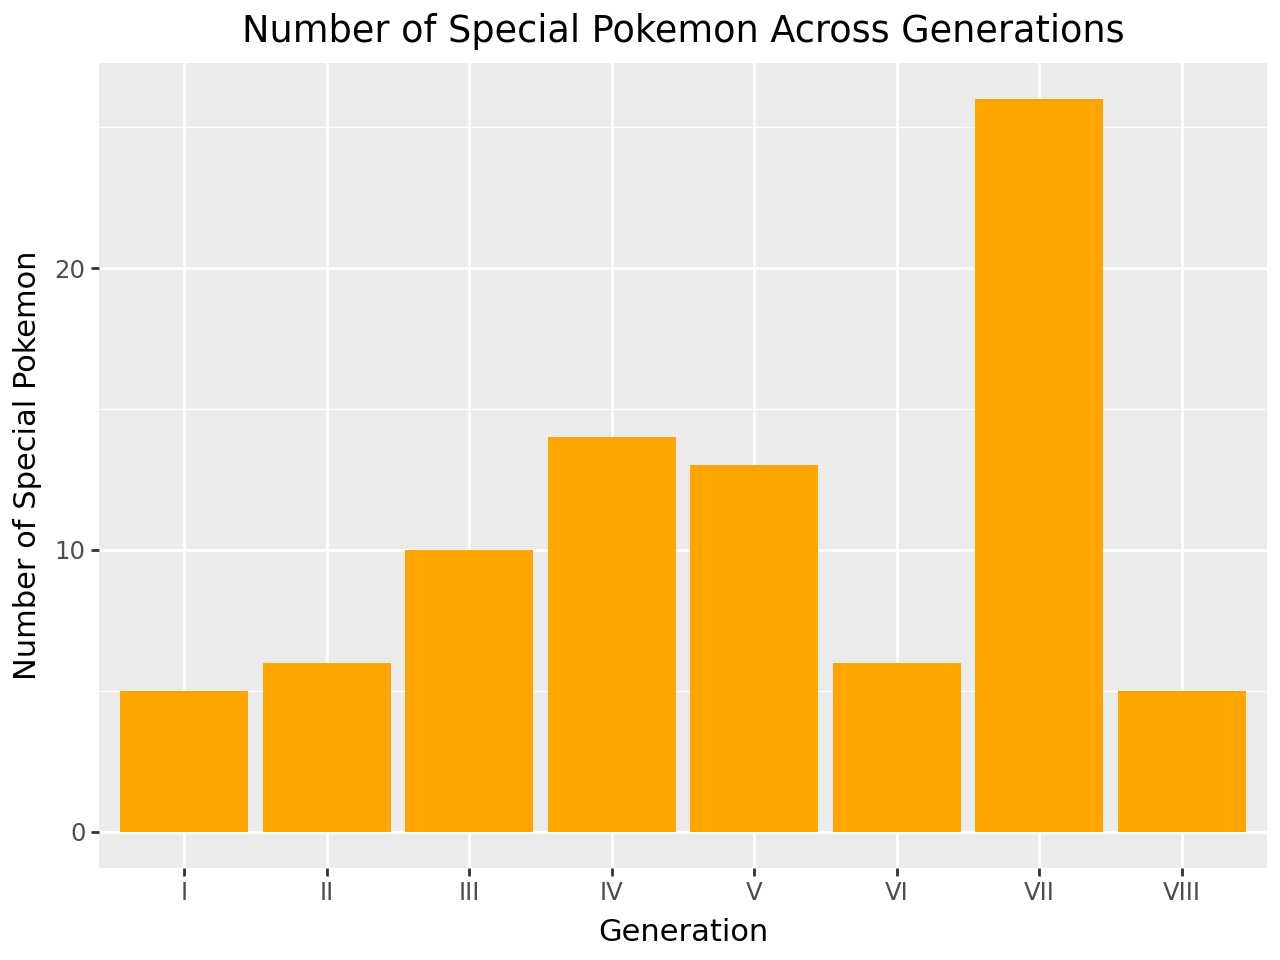

In [9]:
pokemon['is_special'] = (
    (pokemon['is_legendary'] == 1) |
    (pokemon['is_sublegendary'] == 1) |
    (pokemon['is_mythical'] == 1)
).astype(int)

special_by_gen = (
    pokemon
    .groupby('gen')['is_special']
    .sum()
    .reset_index()
)

(
    ggplot(special_by_gen, aes(x='gen', y='is_special'))
    + geom_col(fill='orange')
    + labs(
        title='Number of Special Pokemon Across Generations',
        x='Generation',
        y='Number of Special Pokemon'
    )
)


**Q3**: Create a new column `rarity`.
- `rarity` is the rarity of pokemon: `normal`, `sublegendary`, `mythical`, and `legendary`.
  - To do this based on what we learned so far, you can use subset. `pokemon.loc[pokemon['is_legendary']==1, 'rarity'] = 'legendary'`. You will need to create `rarity` column first (e.g., `pokemon['rarity'] = 'normal'`). We will learn other methods in the upcoming lectures.

Create a new barplot similar to Q2 but this time add color based on rarity (`fill = rarity`)


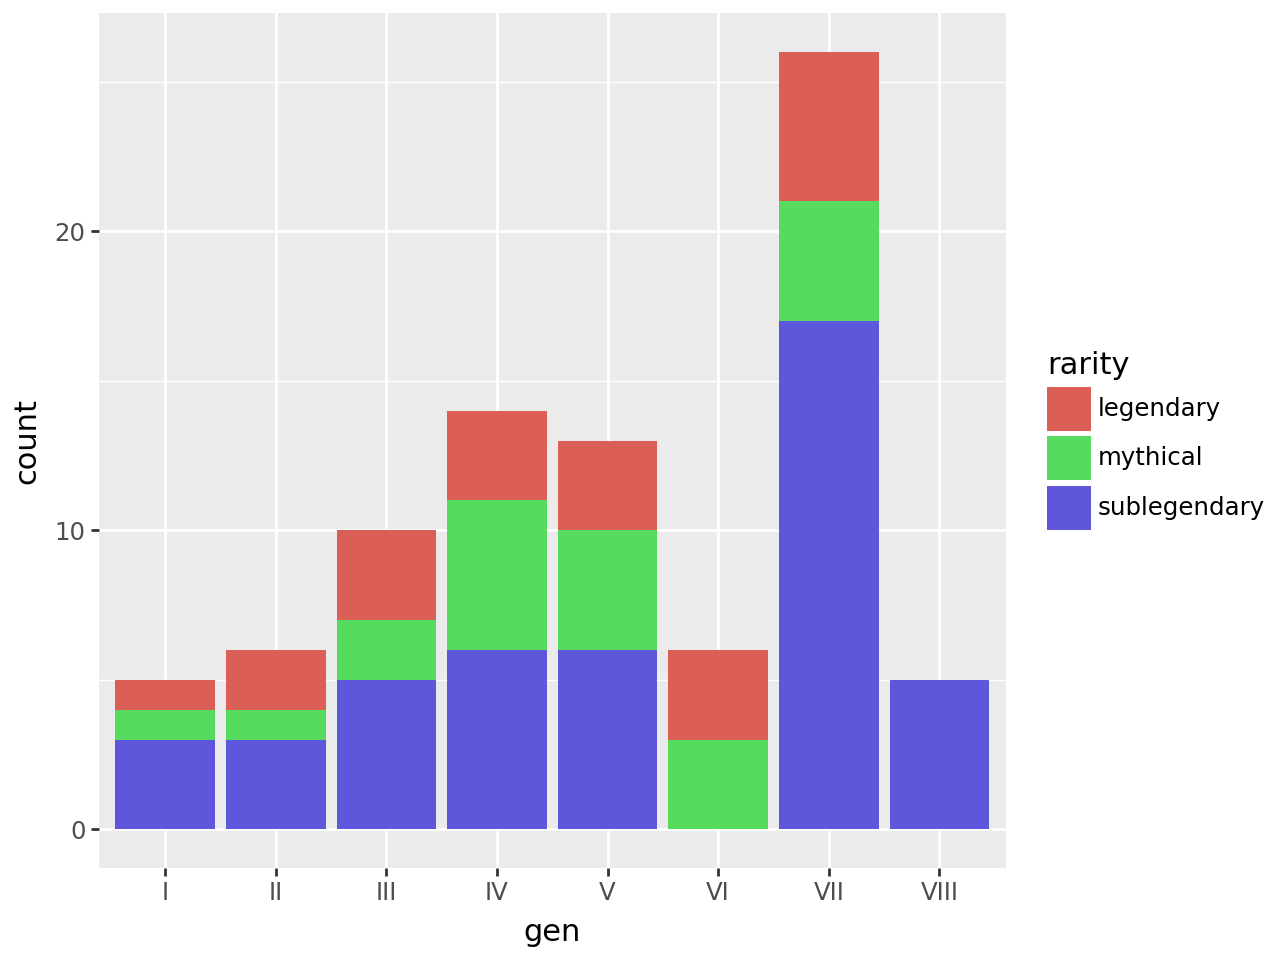

In [ ]:
# Expected result

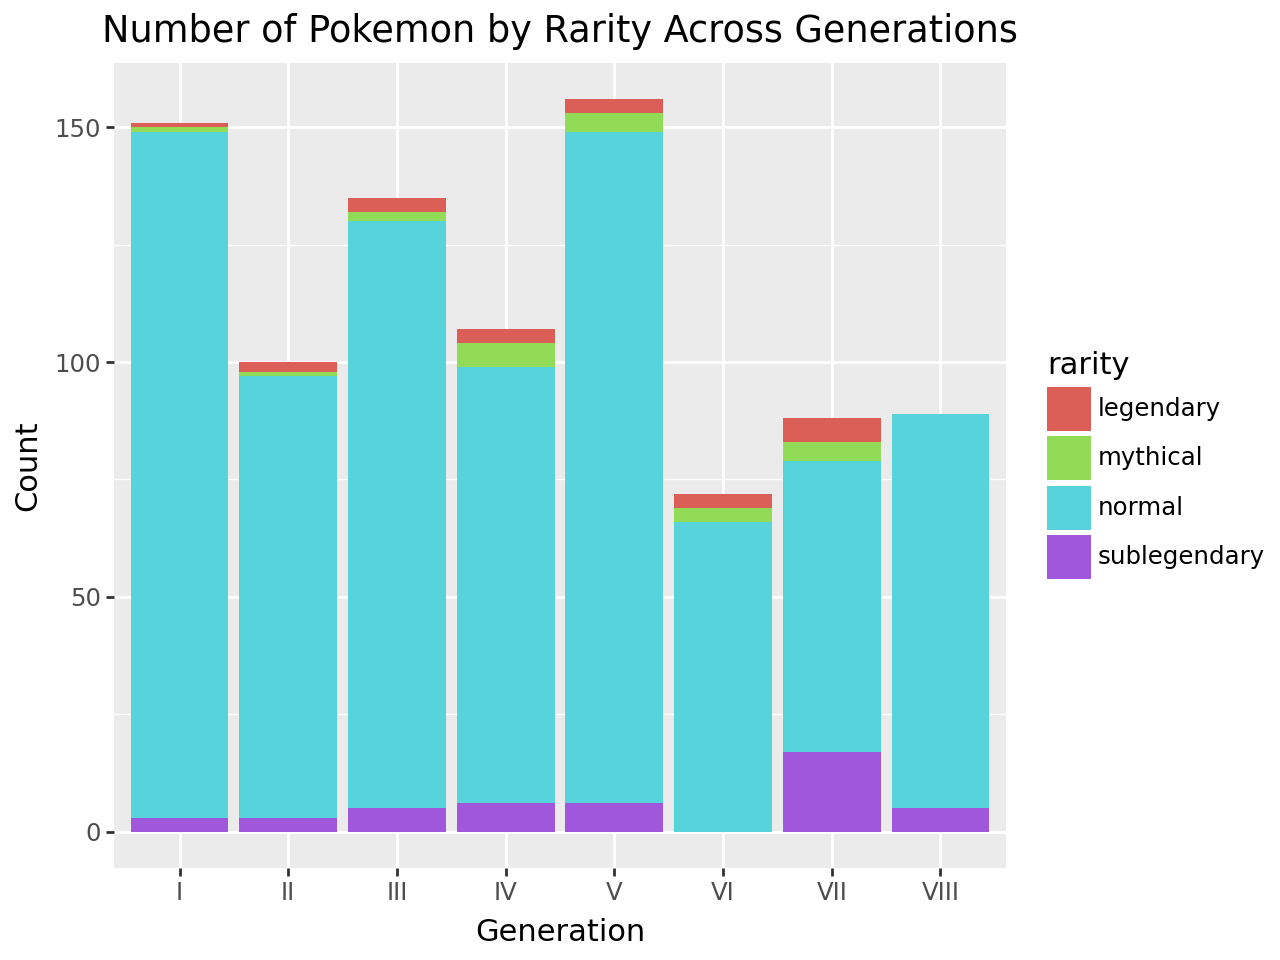

In [20]:
pokemon['rarity'] = 'normal'

pokemon.loc[pokemon['is_sublegendary'] == 1, 'rarity'] = 'sublegendary'
pokemon.loc[pokemon['is_mythical'] == 1, 'rarity'] = 'mythical'
pokemon.loc[pokemon['is_legendary'] == 1, 'rarity'] = 'legendary'

(
    ggplot(pokemon, aes(x='gen', fill='rarity'))
    + geom_bar()
    + labs(
        title='Number of Pokemon by Rarity Across Generations',
        x='Generation',
        y='Count'
    )
)

**Q4**: Create a plot to compare the number of `fire`, `water`, `grass` primary types between gen 1 and gen 3.
- Make this graph easier to compare betwen gen.
- Note: use `geom_bar(position='dodge')` to make the graph easier to compare

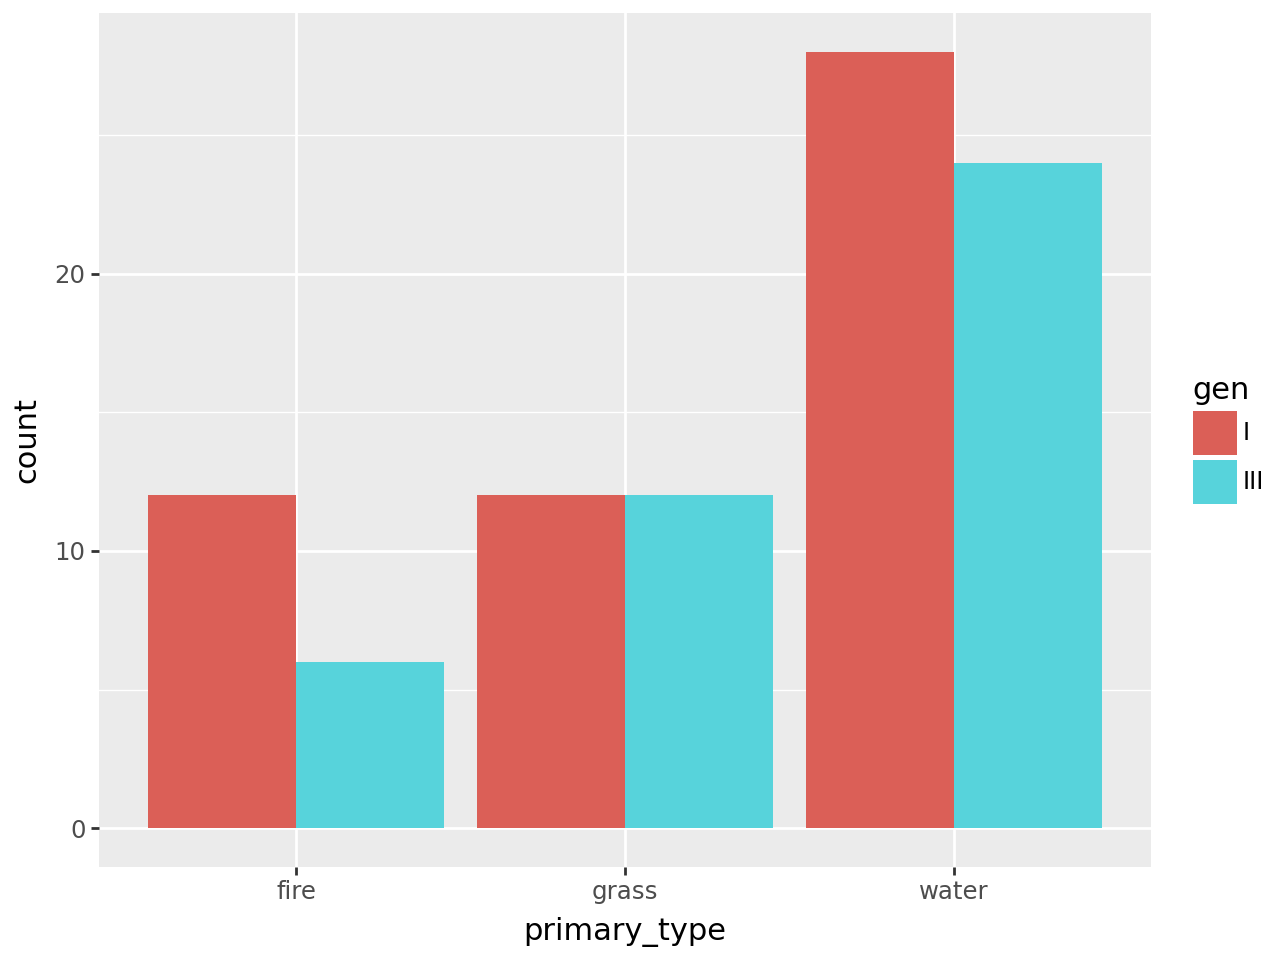

In [ ]:
# Expected Result

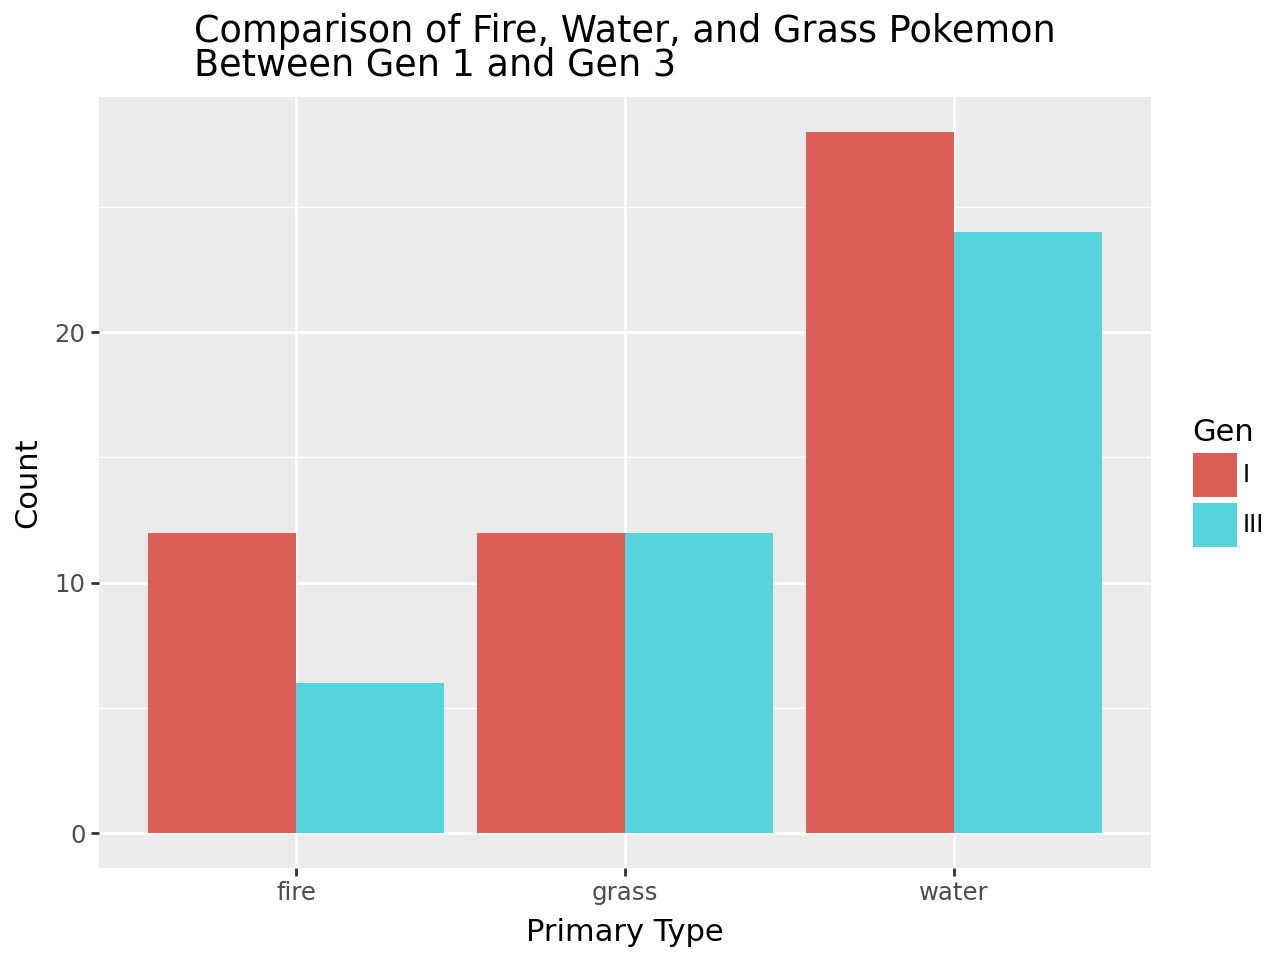

In [17]:
q4_data = pokemon[
    (pokemon['gen'].isin(['I', 'III'])) &
    (pokemon['primary_type'].isin(['fire', 'water', 'grass']))
]
(
    ggplot(q4_data, aes(x='primary_type', fill='gen'))
    + geom_bar(position='dodge')
    + labs(
        title='Comparison of Fire, Water, and Grass Pokemon\nBetween Gen 1 and Gen 3',
        x='Primary Type',
        y='Count',
        fill='Gen'
    )
)


**Q5**: Create a plot to compare the number of `fire`, `water`, `grass` primary types across all gen. This time make it easier to compare between type within each gen. (We will learn a better way next class.)

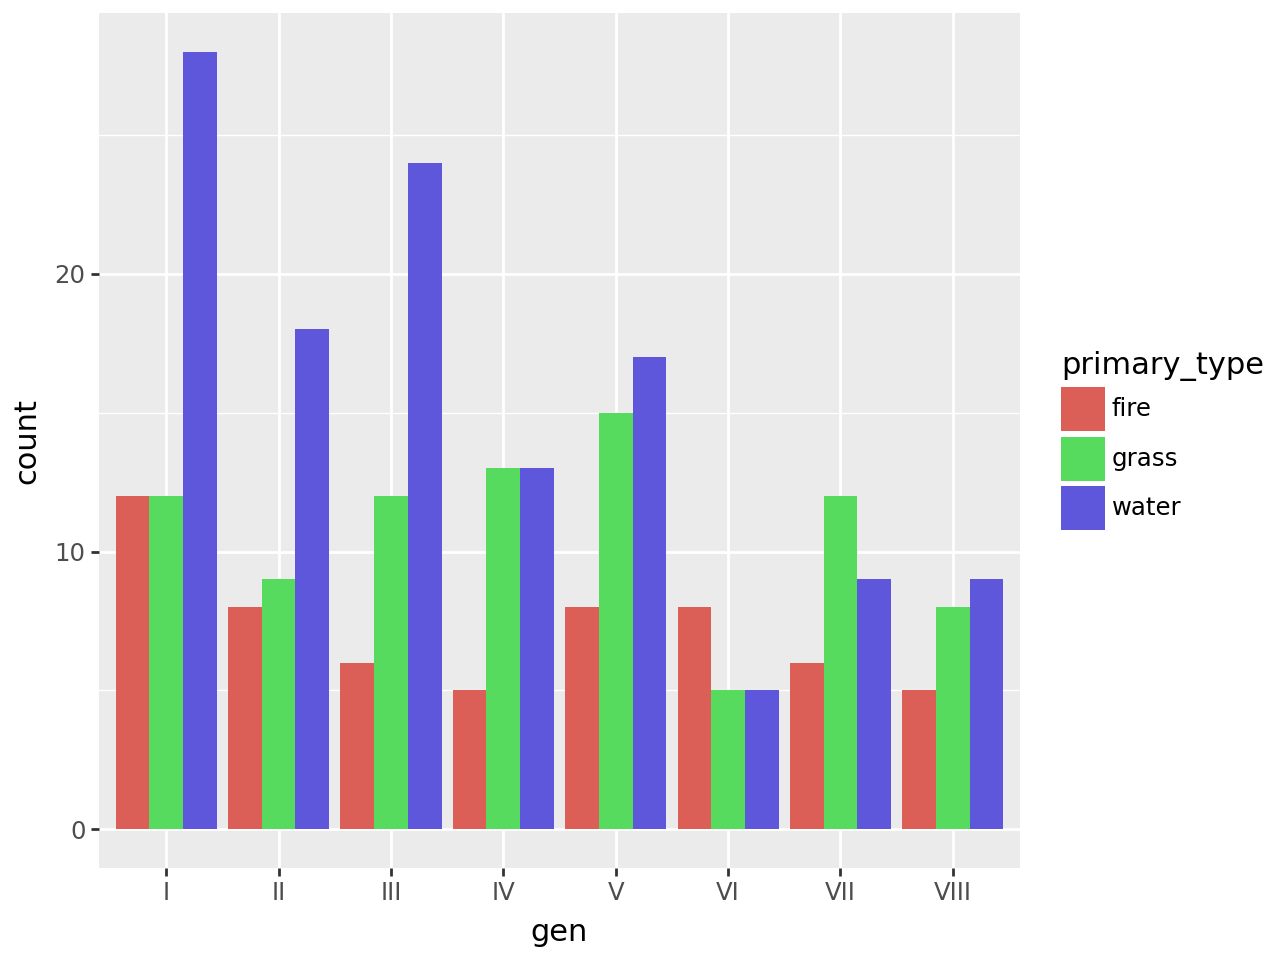

In [ ]:
# Expected Result

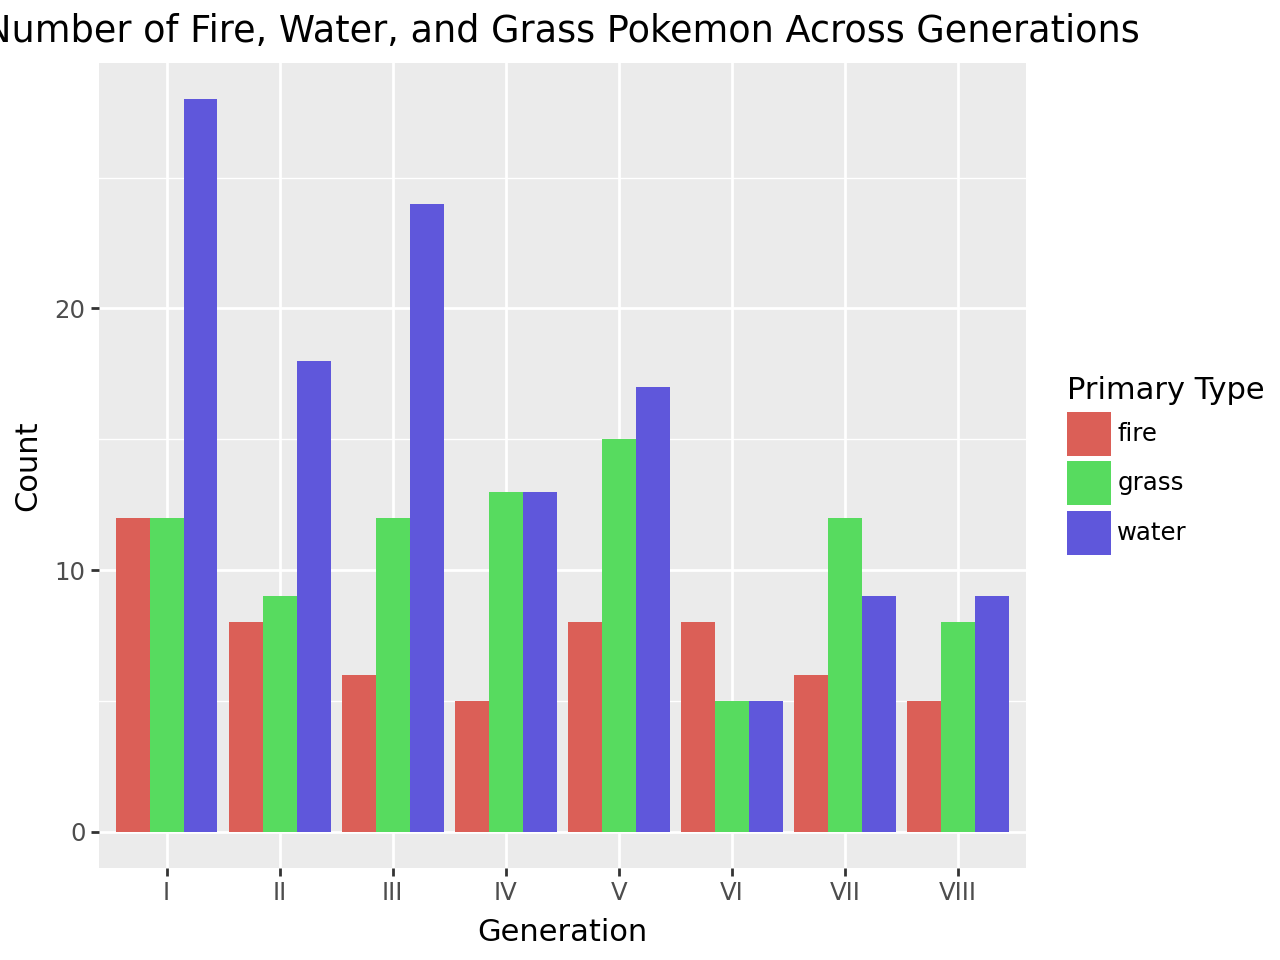

In [19]:
q5_data = pokemon[
    pokemon['primary_type'].isin(['fire', 'water', 'grass'])
]
(
    ggplot(q5_data, aes(x='gen', fill='primary_type'))
    + geom_bar(position='dodge')
    + labs(
        title='Number of Fire, Water, and Grass Pokemon Across Generations',
        x='Generation',
        y='Count',
        fill='Primary Type'
    )
)